In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


### DATASET COLUMNS
- **PLAYER NAME:** Name of the player.
- **PLAYER TEAM:** The team to which the player belongs.
- **PLAYER POSITION:** Position played by the player (e.g., quarterback, running back, wide receiver).
- **LOC:** Location of the game (home or away).
- **OPP:** Opponent team.
- **STATUS:** Player's status (e.g., active, injured).
- **PROJ:** Projected performance.
- **PASSING C/A:** Passing completions/attempts.
- **PASSING YDS:** Passing yards.
- **PASSING TD:** Passing touchdowns.
- **PASSING INT:** Passing interceptions.
- **RUSHING CAR:** Rushing attempts.
- **RUSHING YDS:** Rushing yards.
- **RUSHING TD:** Rushing touchdowns.
- **RECEIVING REC:** Receptions.
- **RECEIVING YDS:** Receiving yards.
- **RECEIVING TD:** Receiving touchdowns.
- **RECEIVING TAR:** Receiving targets.
- **MISC 2PC:** Miscellaneous 2-point conversions.
- **MISC FUML:** Miscellaneous fumbles.
- **MISC TD:** Miscellaneous touchdowns.
- **TOTAL:** Overall total or combined score.


### POINT CALCULATION
**Quarterback (QB):**
- **Passing Points:**
  - Passing Points = (Passing Yards / Yardage Points) + (Passing Touchdowns * Touchdown Points) - (Interceptions * Interception Points)

**Running Back (RB):**
- **Rushing Points:**
  - Rushing Points = (Rushing Yards / Rushing Yardage Points) + (Rushing Touchdowns * Touchdown Points)
- **Receiving Points:**
  - Receiving Points = (Receptions * Reception Points) + (Receiving Yards / Receiving Yardage Points) + (Receiving Touchdowns * Touchdown Points)
- **Total Points for RB:**
  - Total Points = Rushing Points + Receiving Points

**Wide Receiver (WR):**
- **Receiving Points:**
  - Receiving Points = (Receptions * Reception Points) + (Receiving Yards / Receiving Yardage Points) + (Receiving Touchdowns * Touchdown Points)

**Tight End (TE):**
- **Receiving Points:**
  - Receiving Points = (Receptions * Reception Points) + (Receiving Yards / Receiving Yardage Points) + (Receiving Touchdowns * Touchdown Points)


## Data Cleaning

The following process cleans out all empty datapoints

In [15]:

# Define the file path
file_path = r'C:\Users\admin\Desktop\MEMT680\final_project\src\final_project\FantasyFootballWeekly.csv'


# Read the CSV file into a pandas DataFrame
df_before_cleaning = pd.read_csv(file_path)

# Display the number of rows and columns before cleaning
print("Number of rows before cleaning:", df_before_cleaning.shape[0])
print("Number of columns before cleaning:", df_before_cleaning.shape[1])

# Replace "--" with NaN and drop rows containing NaN
df_before_cleaning.replace("--", pd.NA, inplace=True)
df_before_cleaning.dropna(inplace=True)

# Split 'PASSING C/A' into two columns and drop the original column
df_before_cleaning[['PASSING_C', 'PASSING_A']] = df_before_cleaning['PASSING C/A'].str.split('/', expand=True)
df_before_cleaning.drop(columns=['PASSING C/A'], inplace=True)

# Display the number of rows and columns after cleaning
print("\nNumber of rows after cleaning:", df_before_cleaning.shape[0])
print("Number of columns after cleaning:", df_before_cleaning.shape[1])

# Save the cleaned DataFrame back to a CSV file
cleaned_file_path = file_path.replace('.csv', '_cleaned.csv')
df_before_cleaning.to_csv(cleaned_file_path, index=False)



Number of rows before cleaning: 11055
Number of columns before cleaning: 22

Number of rows after cleaning: 4233
Number of columns after cleaning: 23


# Supervised Machine Learning

## Linear Regression

R2 Score: 0.6903344585633926
Mean Squared Error (MSE): 11.24301621045874


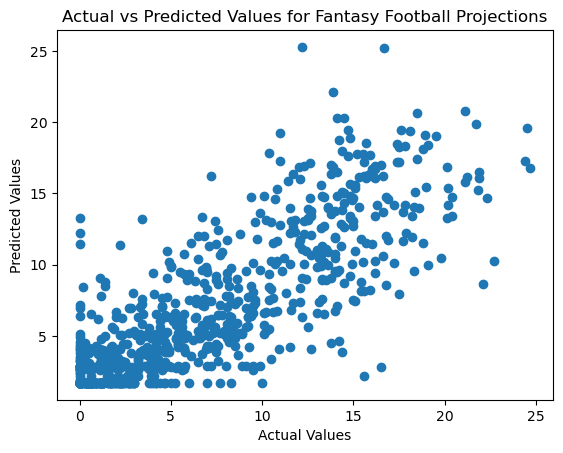

In [18]:


# Load the cleaned dataset
cleaned_file_path = r'C:\Users\admin\Desktop\MEMT680\final_project\src\final_project\FantasyFootballWeekly_cleaned.csv'
df = pd.read_csv(cleaned_file_path)



def linear_regression_analysis(file_path):
    # Load the cleaned dataset
    df = pd.read_csv(file_path)

    # Select the relevant columns for the features and target
    # Replace the column names below with the columns you want to use
    features = df[['PASSING_C', 'PASSING_A', 'PASSING YDS', 'PASSING TD', 'PASSING INT',
                   'RUSHING CAR', 'RUSHING YDS', 'RUSHING TD', 'RECEIVING REC',
                   'RECEIVING YDS', 'RECEIVING TD', 'RECEIVING TAR',
                   'MISC 2PC', 'MISC FUML', 'MISC TD', 'TOTAL']]

    target = df['PROJ']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate R2 score
    r2 = r2_score(y_test, predictions)
    print(f'R2 Score: {r2}')

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error (MSE): {mse}')

    # Plotting predictions vs actual values
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values for Fantasy Football Projections')
    plt.show()

# Define the file path
file_path = r'C:\Users\admin\Desktop\MEMT680\final_project\src\final_project\FantasyFootballWeekly.csv'



# Perform linear regression analysis on the cleaned data
linear_regression_analysis(cleaned_file_path)


### Random Forest Regression Model

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score




# Choose features (X) and target (y)
features = df[['PASSING_C', 'PASSING_A', 'PASSING YDS', 'PASSING TD', 'PASSING INT', 'RUSHING CAR', 'RUSHING YDS', 'RUSHING TD', 'RECEIVING REC', 'RECEIVING YDS', 'RECEIVING TD', 'RECEIVING TAR', 'MISC 2PC', 'MISC FUML', 'MISC TD']]
target = df['PROJ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')


# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regression')
plt.show()


# Feature importance plot
feature_importance = rf_model.feature_importances_
features_list = features.columns

plt.barh(features_list, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regression - Feature Importance')
plt.show()


Mean Squared Error (MSE): 12.461585875482765
R2 Score: 0.6567714868452815
